In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('laptops.csv')
df.sample()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1190,Lenovo,Gaming,8,2.4,10.683645,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Windows


In [3]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [4]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

categorical = df.select_dtypes(include=['object']).columns


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

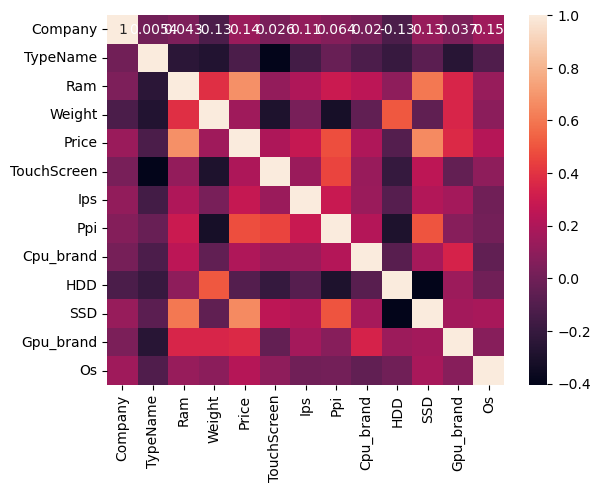

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()


In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
X = df.drop('Price', axis=1)
y = df['Price']

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [11]:
model_rfc = RandomForestRegressor()
model_rfc.fit(X, y)

RandomForestRegressor()

In [12]:
y_pred_rfc = model_rfc.predict(X_test)


In [13]:
model_rfc.score(X_test,y_test)

0.9818810200961771

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
rfc_mse = mean_squared_error(y_test, y_pred_rfc)
rfc_mae = mean_absolute_error(y_test, y_pred_rfc)
rfc_r2 = r2_score(y_test, y_pred_rfc)

In [16]:
print('Random Forest Regressor Performance')
print('Mean Squared Error : ',rfc_mse)
print('Mean Absolute Error : ',rfc_mae)
print('R-Squared : ',rfc_r2)

Random Forest Regressor Performance
Mean Squared Error :  0.018712508742411302
Mean Absolute Error :  0.10417362619658176
R-Squared :  0.9818810200961771


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_lr = model_lr.predict(X_test)

In [20]:
model_lr.score(X_test,y_test)

0.6677584828673422

In [21]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

In [22]:
print('Linear Regression Performance')
print('Mean Squared Error : ',lr_mse)
print('Mean Absolute Error : ',lr_mae)
print('R-Squared : ',lr_r2)

Linear Regression Performance
Mean Squared Error :  0.34312485178181
Mean Absolute Error :  0.47594154765422086
R-Squared :  0.6677584828673422


In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
y_pred_dt = model_dt.predict(X_test)

In [26]:
model_dt.score(X_test,y_test)

0.8020157761717622

In [27]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

In [28]:
print('Decision Tree Performance')
print('Mean Squared Error : ',dt_mse)
print('Mean Absolute Error : ',dt_mae)
print('R-Squared : ',dt_r2)

Decision Tree Performance
Mean Squared Error :  0.20446965220507432
Mean Absolute Error :  0.33155896710080673
R-Squared :  0.8020157761717622


In [29]:
model_info={
    'Model':['Linear Regression','Decision tree','Random Forest Regressor'],
    'MAE':[lr_mae,dt_mae,rfc_mae],
    'MSE':[lr_mse,dt_mse,rfc_mse],
    'R2':[lr_r2,dt_r2,rfc_r2],  
}
per = pd.DataFrame(model_info)
per

,Model,MAE,MSE,R2
0,Linear Regression,0.475942,0.343125,0.667758
1,Decision tree,0.331559,0.204470,0.802016
2,Random Forest Regressor,0.104174,0.018713,0.981881


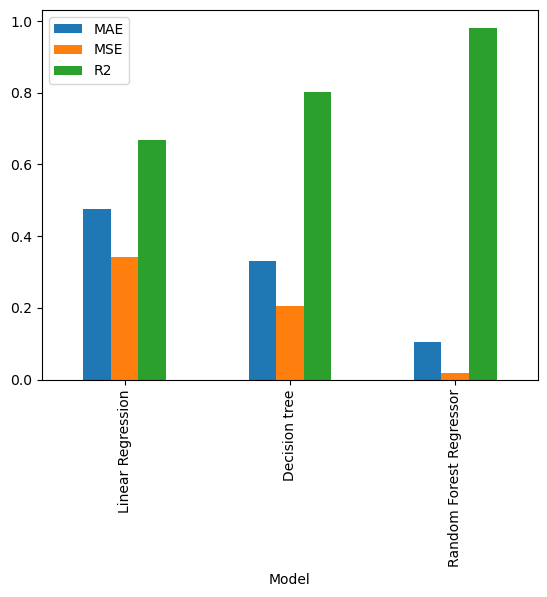

In [30]:
per.plot(kind='bar', x= 'Model')
plt.show()


In [31]:
print('Best Model Random Forest Classifier')

Best Model Random Forest Classifier


In [32]:
def laptop(comp, name, ram, wgt, touch, ips, ppi, cpu, hdd, ssd, gpu, os):
    ft = {
        'Company': comp,
        'TypeName': name,
        'Ram': ram,
        'Weight': wgt,
        'TouchScreen': touch,
        'Ips': ips,
        'Ppi': ppi,
        'Cpu_brand': cpu,
        'HDD': hdd,
        'SSD': ssd,
        'Gpu_brand': gpu,
        'Os': os
    }
    
    input = pd.DataFrame([ft])
    predicted = model_rfc.predict(input)
    return predicted[0]

print(laptop(7, 2, 12, 3.5, 2, 0, 252, 2, 1, 712, 4, 2))


2.230355254415014
